# Area Bubble Pointer Evaluation
## Experiment Design
### Goals
Goal of the experiment is to compare the performance of standard pointing with area bubble pointing.

The concept of this new pointing technique is described in detail in pointing_technique.py.
### Design
For this experiment we chose a mulitfactorial within-subject design as learning doesn't have a lot of influence on the results and it is important to see how much the pointing performance is improved or not by each person using a certain pointing technique.
#### Experimental setup
At the beginning all test settings are read from an ini- or json-file that was passed as a command line parameter. These files have to be in the following formats:
<table>
<tr>
    <td><u>ini-Files:</u></td>
    <td><u>json-Files:</u></td>
    </tr>
<tr>
    <td>
        [experiment_setup]
        <br>UserID = 1
        <br>Conditions = 250,75;100,10;...
        <br>ImprovePointing = 1
    </td>
    <td>
        {
        <br>"UserID" : "1",
        <br>"Conditions": "100,10;100,25;...,
        <br>"ImprovePointing": "0"
        <br>}
    </td>
</tr>
</table>

<br>The orders of the containing conditions were counterbalanced using a balanced latin square.</br>
<p>Durin a single trial multiple white circles and one green circle are presented to a participant. Their radii are determined by the current trial setup. The green circle is always presented around the center of the screen with distance set by the current trial's distance. The other circles are distributed randomly on the whole drawing area trying not to overlap each other to stay distinguishable from the others and not to overlap the main target that has to be clicked. All circles have the ability to be highlighted to inform the participants that the target is in click range.
</p>
<p>While using the bubble pointing technique it is always possible to switch back to the default pointing technique by pressing the right mouse button. With the start of the next trial the technique is reset to bubble pointing to avoid disabling it from the beginning and not using it throughout the whole test which would bias the results.
</p>
#### Task description
The participants have to click the green circle as fast as possible while avoiding misses. 

### Hypotheses and variables
As we conduct this experiment to improve pointing speed, we pose the hypothesis that using our new pointing technique leads to a better pointing performance. In addition, the two independet variables (UV)/factors target size and target distance are included. Therefore, we have following variables:
* **UV**: target size, target distance, pointing technique
* **AV (=dependent variable)**: pointing performance (task completion/errors)

The factors target size and distance have each four different size/distance levels. The pointing technique has the two states standard pointer and area bubble pointer. This results in 28 conditions in total. Every condition should be repeated four times which means that 112 trials are conducted per person.

Next to **UV** and **AV**, we have the following controlled variables (**CV**): Every participant uses the same pointing device (mouse) which means that all four tests are conducted at the same notebook. This leads to less errors concerning the CD gain and the ground the mouse is lying on. Different grounds may lead to different mouse movement speeds and may therefore influence the task completion time and pointing performance. Further, we try to conduct all tests at about the same time to minimize confounding variables. Further all participants have to user their preferred hand to perform the tests.

Finally, it is important to mention that the conditions are counterbalanced before every test run.

### Participants
When choosing participants no restrictions have to be considered as the target domain is the general public. Therefore, no special knowledge is necessary. The only limitation are physical handicaps
like blindness and deafness which will bias the test validity. Despite the quite small number of test persons we try to create a heterogeneous pool of participants. So the test was conducted with two female and two male persons of different ages.

In [198]:
%matplotlib inline
import pandas
import pylab
from scipy.stats import ttest_ind
try:
    # import the data
    data = pandas.read_csv('data.csv', delimiter=';')
    # select only the relevant columns
    data = data[['user_id', 'trial', 'target_distance', 'target_size', 
                 'movement_time (ms)', 'click_offset_x', 'click_offset_y', 
                 'number_of_errors', 'improved_pointing']]
except Exception:
    print("Error! Maybe you need to install pandas!")


In [199]:
# constant strings
MOVEMENT_TIME = 'movement_time (ms)'
NUMBER_ERRORS = 'number_of_errors'
TRIAL_ID = 'trial ID'
STANDARD_POINTER = 'Standard Pointer'
AREA_BUBBLE_POINTER = 'Area Bubble Pointer'
CIRCLE_MARKER = 'o'
RED = 'r'
GREEN = 'g'
YELLOW = 'y'
BLUE = 'b'

# Group data to conditions
data_SP_D100_W10 = data[(data['target_distance'] == 100) &
                        (data['target_size'] == 10) & (data['improved_pointing'] == False)]
data_SP_D100_W25 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 25) & (data['improved_pointing'] == False)]
data_SP_D100_W50 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 50) & (data['improved_pointing'] == False)]
data_SP_D100_W75 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 75) & (data['improved_pointing'] == False)]
data_SP_D150_W10 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 10) & (data['improved_pointing'] == False)]
data_SP_D150_W25 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 25) & (data['improved_pointing'] == False)]
data_SP_D150_W50 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 50) & (data['improved_pointing'] == False)]
data_SP_D150_W75 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 75) & (data['improved_pointing'] == False)]
data_SP_D200_W10 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 10) & (data['improved_pointing'] == False)]
data_SP_D200_W25 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 25) & (data['improved_pointing'] == False)]
data_SP_D200_W50 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 50) & (data['improved_pointing'] == False)]
data_SP_D200_W75 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 75) & (data['improved_pointing'] == False)]
data_SP_D250_W10 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 10) & (data['improved_pointing'] == False)]
data_SP_D250_W25 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 25) & (data['improved_pointing'] == False)]
data_SP_D250_W50 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 50) & (data['improved_pointing'] == False)]
data_SP_D250_W75 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 75) & (data['improved_pointing'] == False)]
data_PT_D100_W10 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 10) & data['improved_pointing'] == True]
data_PT_D100_W25 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 25) & data['improved_pointing'] == True]
data_PT_D100_W50 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 50) & data['improved_pointing'] == True]
data_PT_D100_W75 = data[(data['target_distance'] == 100) &
                   (data['target_size'] == 75) & data['improved_pointing'] == True]
data_PT_D150_W10 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 10) & data['improved_pointing'] == True]
data_PT_D150_W25 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 25) & data['improved_pointing'] == True]
data_PT_D150_W50 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 50) & data['improved_pointing'] == True]
data_PT_D150_W75 = data[(data['target_distance'] == 150) &
                   (data['target_size'] == 75) & data['improved_pointing'] == True]
data_PT_D200_W10 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 10) & data['improved_pointing'] == True]
data_PT_D200_W25 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 25) & data['improved_pointing'] == True]
data_PT_D200_W50 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 50) & data['improved_pointing'] == True]
data_PT_D200_W75 = data[(data['target_distance'] == 200) &
                   (data['target_size'] == 75) & data['improved_pointing'] == True]
data_PT_D250_W10 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 10) & data['improved_pointing'] == True]
data_PT_D250_W25 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 25) & data['improved_pointing'] == True]
data_PT_D250_W50 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 50) & data['improved_pointing'] == True]
data_PT_D250_W75 = data[(data['target_distance'] == 250) &
                   (data['target_size'] == 75) & data['improved_pointing'] == True]

# group data to pointing devices
data_SP = data[data['improved_pointing'] == False]
data_PT = data[data['improved_pointing'] == True]

# group data to participants using standard pointing (= SP)
data_SP_USER1 = data[(data['user_id'] == 1) & (data['improved_pointing'] == False)]
data_SP_USER2 = data[(data['user_id'] == 2) & (data['improved_pointing'] == False)]
data_SP_USER3 = data[(data['user_id'] == 3) & (data['improved_pointing'] == False)]
data_SP_USER4 = data[(data['user_id'] == 4) & (data['improved_pointing'] == False)]

# group data to participants using new pointing technique (= PT)
data_PT_USER1 = data[(data['user_id'] == 1) & (data['improved_pointing'] == True)]
data_PT_USER2 = data[(data['user_id'] == 2) & (data['improved_pointing'] == True)]
data_PT_USER3 = data[(data['user_id'] == 3) & (data['improved_pointing'] == True)]
data_PT_USER4 = data[(data['user_id'] == 4) & (data['improved_pointing'] == True)]


## Scatterplots showing each conditions
The following scatterplots are showing the **absolute pointing performance** (= time performance) of every condition.

The **y-axis** shows the **movement time of the cursor in ms** that was needed to complete the pointing task.

The *x-axis* shows the single *trial ID*s, but does not refer to time!

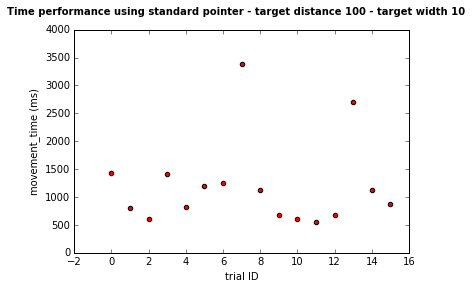

In [200]:
# this method creates a simple scatterplot
def create_scatter_plot(data_x_axis, data_y_axis, title, x_label, y_label, color, marker):
    scatter(data_x_axis, data_y_axis, c=color, marker=marker)
    suptitle(title, fontweight='bold')
    xlabel(x_label)
    ylabel(y_label)

# plot condition SP-target distance 100-target width 10
create_scatter_plot(range(len(data_SP_D100_W10)), list(data_SP_D100_W10[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 100 - target width 10', 
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

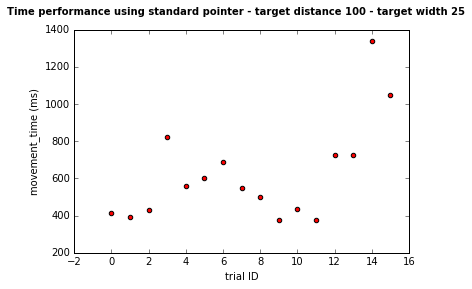

In [201]:
# plot condition SP-target distance 100-target width 25
create_scatter_plot(range(len(data_SP_D100_W25)), list(data_SP_D100_W25[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 100 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

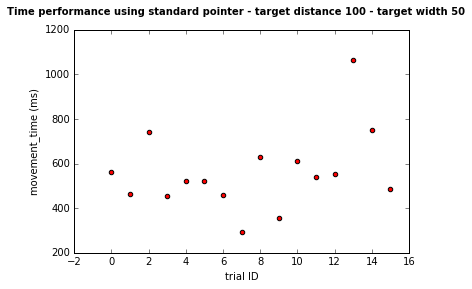

In [202]:
# plot condition SP-target distance 100-target width 50
create_scatter_plot(range(len(data_SP_D100_W50)), list(data_SP_D100_W50[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 100 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

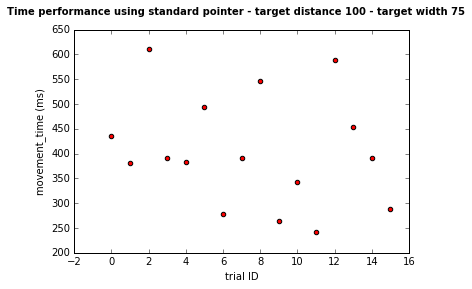

In [203]:
# plot condition SP-target distance 100-target width 75
create_scatter_plot(range(len(data_SP_D100_W75)), list(data_SP_D100_W75[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 100 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

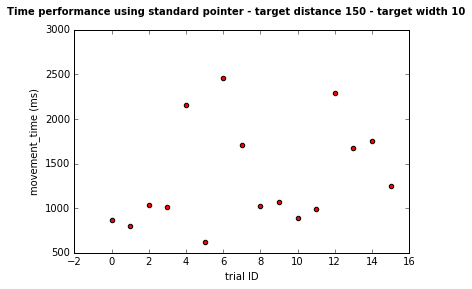

In [204]:
# plot condition SP-target distance 150-target width 10
create_scatter_plot(range(len(data_SP_D150_W10)), list(data_SP_D150_W10[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 150 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

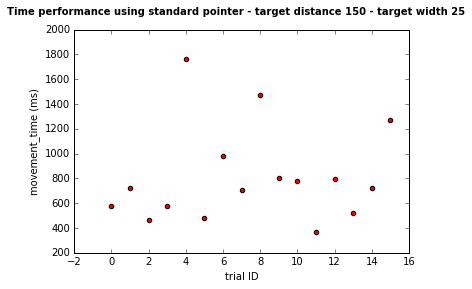

In [205]:
# plot condition SP-target distance 150-target width 25
create_scatter_plot(range(len(data_SP_D150_W25)), list(data_SP_D150_W25[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 150 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

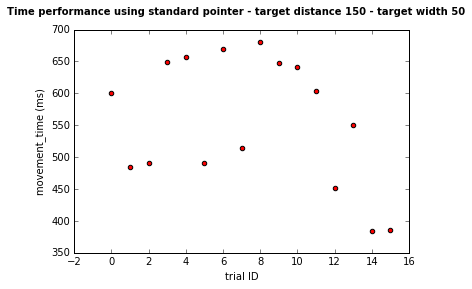

In [206]:
# plot condition SP-target distance 150-target width 50
create_scatter_plot(range(len(data_SP_D150_W50)), list(data_SP_D150_W50[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 150 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

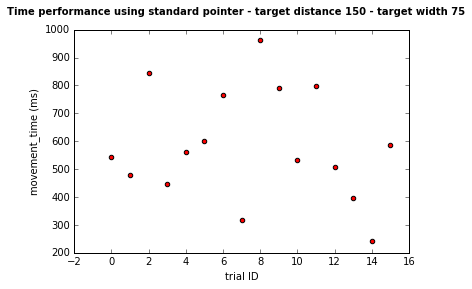

In [207]:
# plot condition SP-target distance 150-target width 75
create_scatter_plot(range(len(data_SP_D150_W75)), list(data_SP_D150_W75[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 150 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

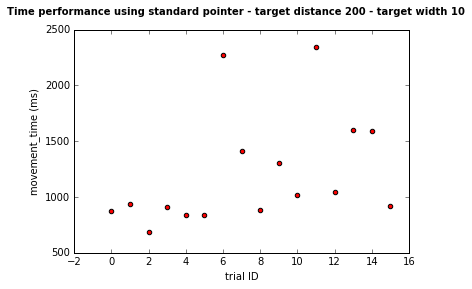

In [208]:
# plot condition SP-target distance 200-target width 10
create_scatter_plot(range(len(data_SP_D200_W10)), list(data_SP_D200_W10[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 200 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

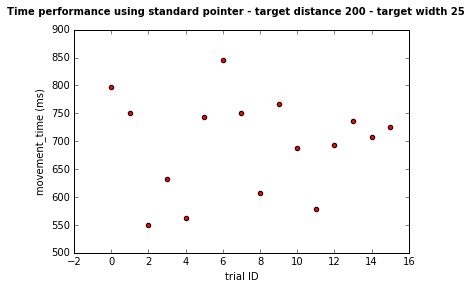

In [209]:
# plot condition SP-target distance 200-target width 25
create_scatter_plot(range(len(data_SP_D200_W25)), list(data_SP_D200_W25[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 200 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

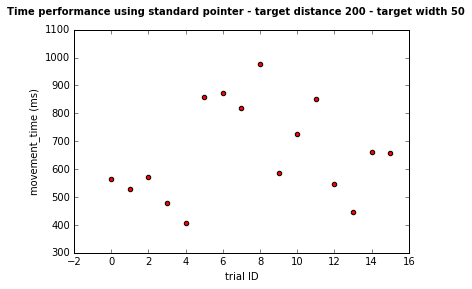

In [210]:
# plot condition SP-target distance 200-target width 50
create_scatter_plot(range(len(data_SP_D200_W50)), list(data_SP_D200_W50[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 200 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

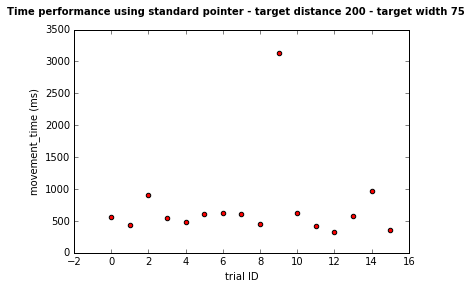

In [211]:
# plot condition SP-target distance 200-target width 75
create_scatter_plot(range(len(data_SP_D200_W75)), list(data_SP_D200_W75[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 200 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

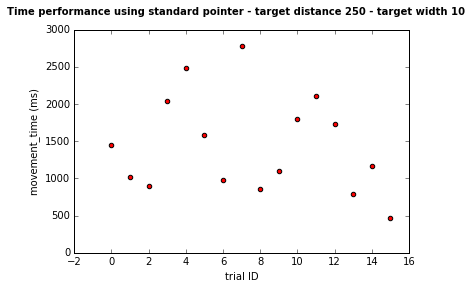

In [212]:
# plot condition SP-target distance 250-target width 10
create_scatter_plot(range(len(data_SP_D250_W10)), list(data_SP_D250_W10[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 250 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

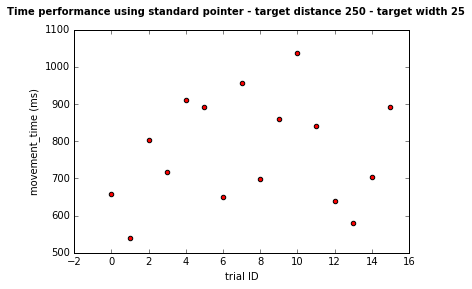

In [213]:
# plot condition SP-target distance 250-target width 25
create_scatter_plot(range(len(data_SP_D250_W25)), list(data_SP_D250_W25[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 250 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

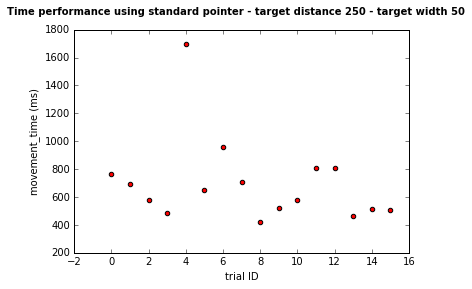

In [214]:
# plot condition SP-target distance 250-target width 50
create_scatter_plot(range(len(data_SP_D250_W50)), list(data_SP_D250_W50[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 250 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

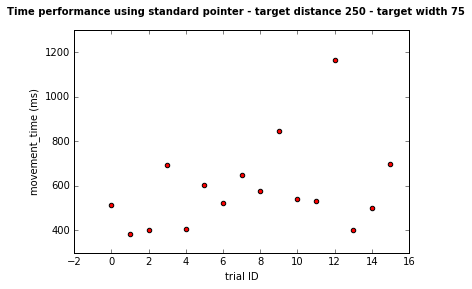

In [215]:
# plot condition SP-target distance 250-target width 75
create_scatter_plot(range(len(data_SP_D250_W75)), list(data_SP_D250_W75[MOVEMENT_TIME]),
                   'Time performance using standard pointer - target distance 250 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)

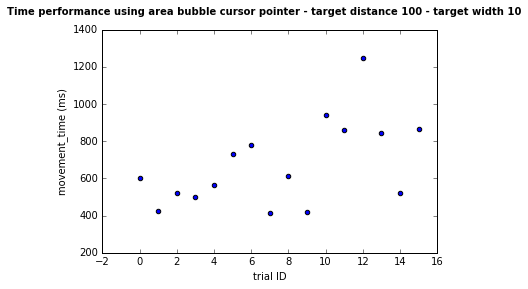

In [216]:
# plot condition PT-target distance 100-target width 10
create_scatter_plot(range(len(data_PT_D100_W10)), list(data_PT_D100_W10[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 100 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

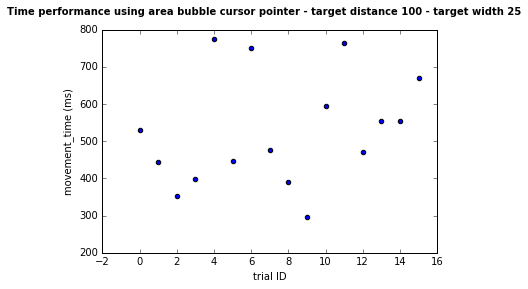

In [217]:
# plot condition PT-target distance 100-target width 25
create_scatter_plot(range(len(data_PT_D100_W25)), list(data_PT_D100_W25[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 100 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

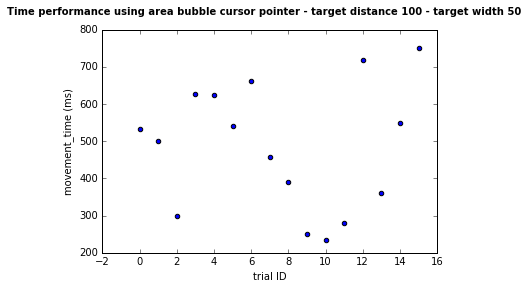

In [218]:
# plot condition PT-target distance 100-target width 50
create_scatter_plot(range(len(data_PT_D100_W50)), list(data_PT_D100_W50[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 100 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

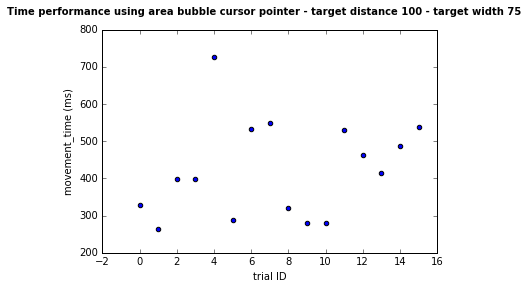

In [219]:
# plot condition PT-target distance 100-target width 75
create_scatter_plot(range(len(data_PT_D100_W75)), list(data_PT_D100_W75[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 100 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

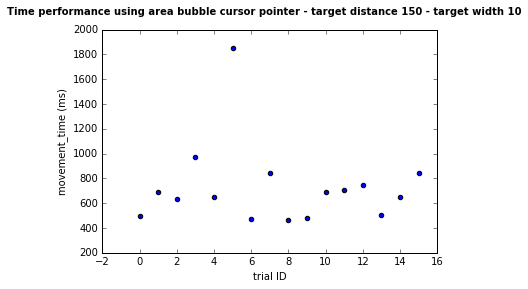

In [220]:
# plot condition PT-target distance 150-target width 10
create_scatter_plot(range(len(data_PT_D150_W10)), list(data_PT_D150_W10[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 150 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

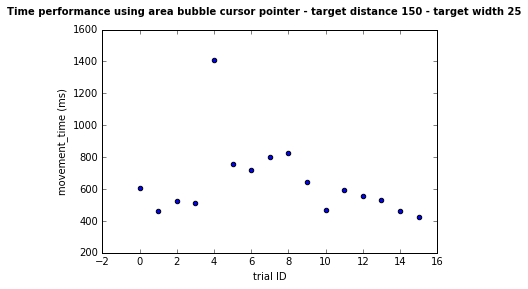

In [221]:
# plot condition PT-target distance 150-target width 25
create_scatter_plot(range(len(data_PT_D150_W25)), list(data_PT_D150_W25[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 150 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

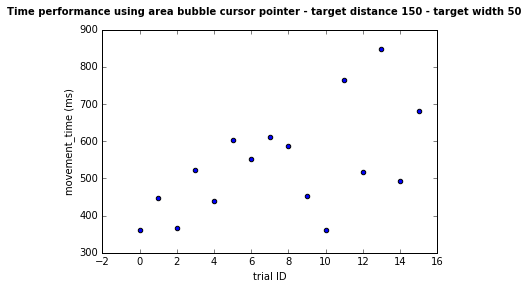

In [222]:
# plot condition PT-target distance 150-target width 50
create_scatter_plot(range(len(data_PT_D150_W50)), list(data_PT_D150_W50[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 150 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

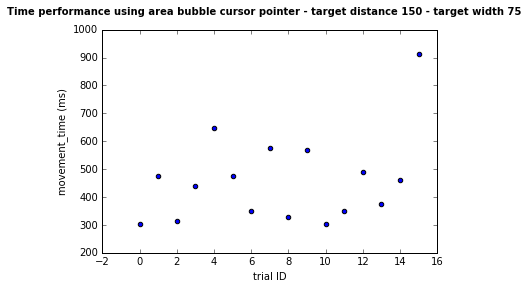

In [223]:
# plot condition PT-target distance 150-target width 75
create_scatter_plot(range(len(data_PT_D150_W75)), list(data_PT_D150_W75[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 150 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

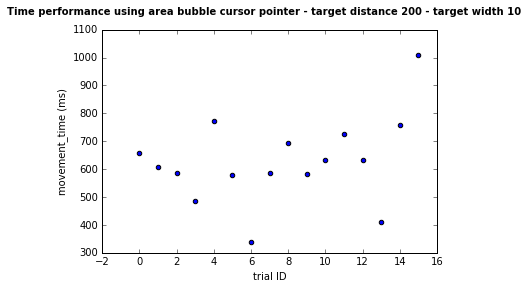

In [224]:
# plot condition PT-target distance 200-target width 10
create_scatter_plot(range(len(data_PT_D200_W10)), list(data_PT_D200_W10[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 200 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

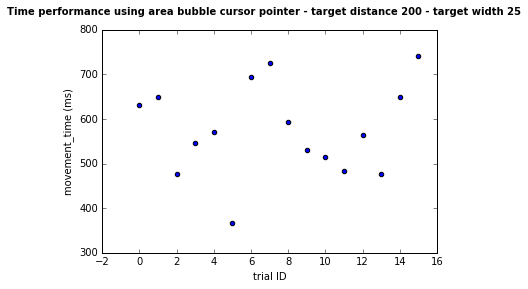

In [225]:
# plot condition PT-target distance 200-target width 25
create_scatter_plot(range(len(data_PT_D200_W25)), list(data_PT_D200_W25[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 200 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

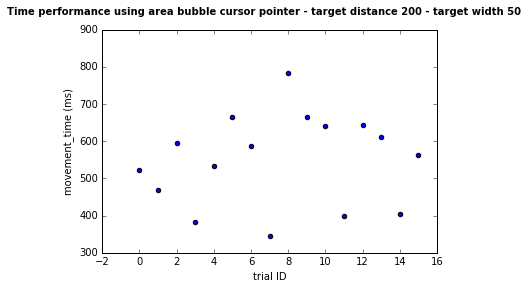

In [226]:
# plot condition PT-target distance 200-target width 50
create_scatter_plot(range(len(data_PT_D200_W50)), list(data_PT_D200_W50[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 200 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

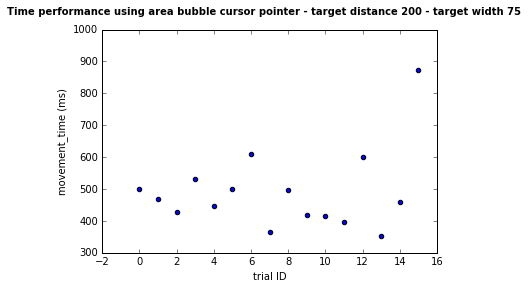

In [227]:
# plot condition PT-target distance 200-target width 75
create_scatter_plot(range(len(data_PT_D200_W75)), list(data_PT_D200_W75[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 200 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

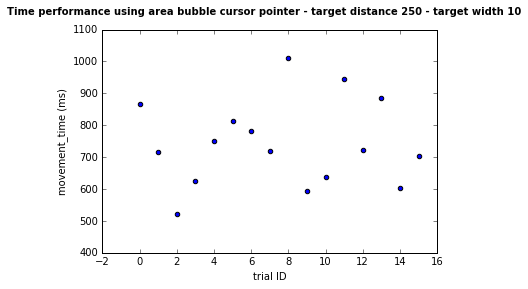

In [228]:
# plot condition PT-target distance 250-target width 10
create_scatter_plot(range(len(data_PT_D250_W10)), list(data_PT_D250_W10[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 250 - target width 10',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

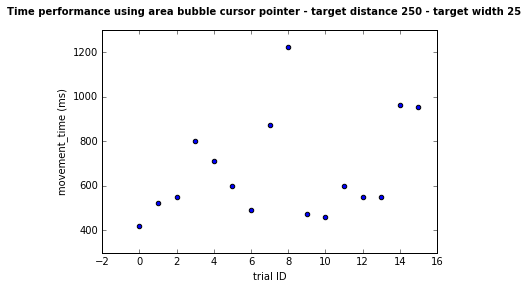

In [229]:
# plot condition PT-target distance 250-target width 25
create_scatter_plot(range(len(data_PT_D250_W25)), list(data_PT_D250_W25[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 250 - target width 25',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

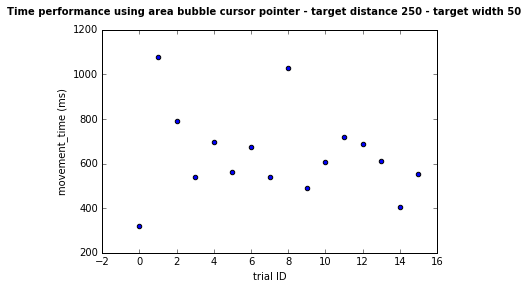

In [230]:
# plot condition PT-target distance 250-target width 50
create_scatter_plot(range(len(data_PT_D250_W50)), list(data_PT_D250_W50[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 250 - target width 50',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

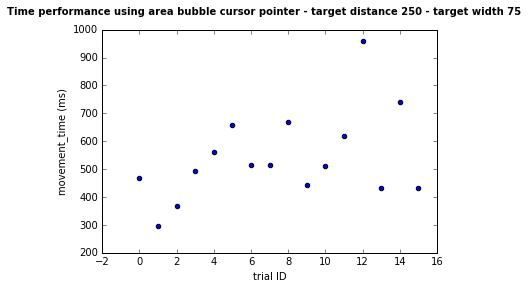

In [231]:
# plot condition PT-target distance 250-target width 75
create_scatter_plot(range(len(data_PT_D250_W75)), list(data_PT_D250_W75[MOVEMENT_TIME]),
                   'Time performance using area bubble cursor pointer - target distance 250 - target width 75',
                    TRIAL_ID, MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)

## Scatterplots showing absolute and relative task performance
... of each trial. Absolute task performance is defined as the time needed to perform the pointing task (= clicking on the highlighted target) while relative task performance is the number of errors that occurred when trying to click on the target.

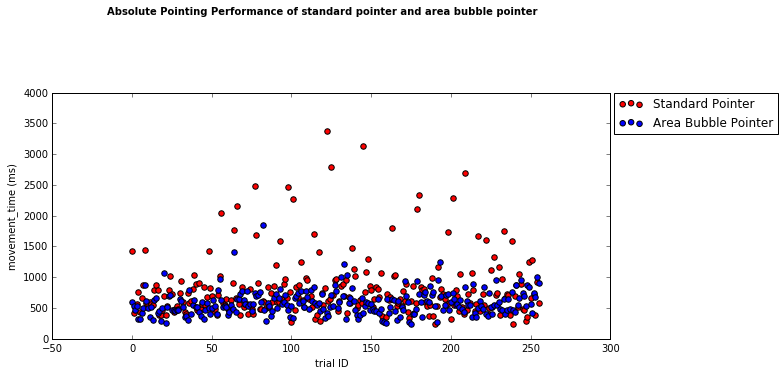

In [232]:
# size of the markers in the scatterplot
MARKER_SIZE = 30

# class that stores the data required for a scatterplot
class ScatterPlotData():
    def __init__(self, data, s, color, label):
        self.data = data
        self.s = s
        self.color = color
        self.label = label

# class that stores data required for labeling the figure
class LabelData():
    def __init__(self, title, xlabel, ylabel):
        self.title = title
        self.xlabel = xlabel
        self.ylabel = ylabel
        
# data for the scatterplots that will be nested in one figure
scatterplots_data = [ScatterPlotData(data_SP[MOVEMENT_TIME], CIRCLE_MARKER, RED, STANDARD_POINTER),
                     ScatterPlotData(data_PT[MOVEMENT_TIME], CIRCLE_MARKER, BLUE, AREA_BUBBLE_POINTER)]

# creates a new figure in which mulitple scatterplots will be drawn
def create_new_figure():
    # init plot creation
    current_figure = figure(figsize=(10, 15));
    scatter_plot = current_figure.add_subplot(311);
    return current_figure, scatter_plot

# plot all scatter plots in one figre
def create_nested_scatter_plot(scatter_plot, data, s, marker, color, label):
    scatter_plot.scatter(range(len(data)),
                     list(data), s=s, marker=marker,
                     c=color, label=label)    

# label the figure with title, x-/y-axis description
def lable_figure(current_figure, scatter_plot, labeldata):
    # add title, name axes (with units)
    current_figure.suptitle(labeldata.title, fontweight='bold')
    scatter_plot.set_xlabel(labeldata.xlabel)
    scatter_plot.set_ylabel(labeldata.ylabel);
    legend(bbox_to_anchor=(1.3, 1), borderaxespad=0.)
    show()

# draws a new scatterplot figure containing multiple nested scatter plots
def create_new_scatterplot_figure(scatterplots, labeldata):
    current_figure, scatter_plot = create_new_figure()
    for i in range(len(scatterplots)):   
        create_nested_scatter_plot(scatter_plot, scatterplots[i].data, MARKER_SIZE, scatterplots[i].s, 
                                   scatterplots[i].color, scatterplots[i].label)        
    lable_figure(current_figure, scatter_plot, labeldata)      

# draws a new scatterplot showing absolute pointing performance of both pointing techniques
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Absolute Pointing Performance of standard pointer and area bubble pointer',
                                        TRIAL_ID, MOVEMENT_TIME))


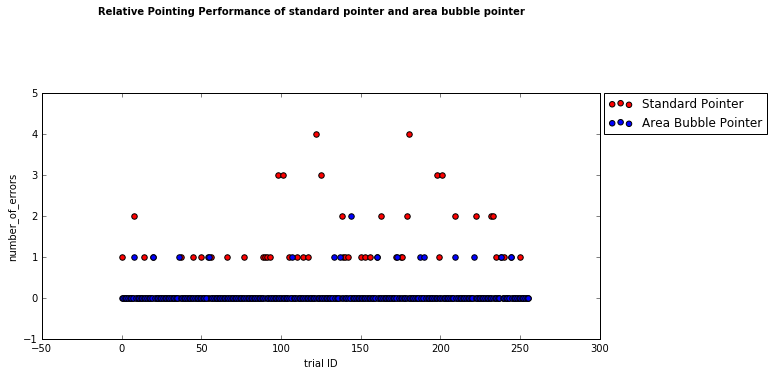

In [233]:
scatterplots_data = [ScatterPlotData(data_SP[NUMBER_ERRORS], CIRCLE_MARKER, RED, STANDARD_POINTER),
                     ScatterPlotData(data_PT[NUMBER_ERRORS], CIRCLE_MARKER, BLUE, AREA_BUBBLE_POINTER)]

# draws a new scatterplot showing relative pointing performance of both pointing techniques
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Relative Pointing Performance of standard pointer and area bubble pointer',
                                        TRIAL_ID, NUMBER_ERRORS))


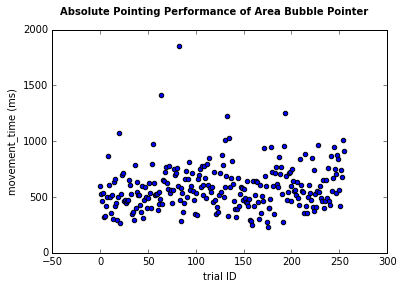

In [234]:
# creates a scatter plot showing absolute pointing performance of the new pointing technique
create_scatter_plot(range(len(data_PT[MOVEMENT_TIME])), list(data_PT[MOVEMENT_TIME]),
                   'Absolute Pointing Performance of Area Bubble Pointer', TRIAL_ID,
                   MOVEMENT_TIME, marker=CIRCLE_MARKER, color=BLUE)


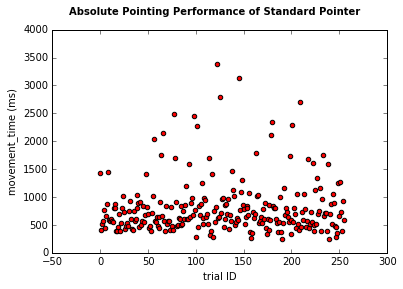

In [235]:
# creates a scatter plot showing absolute pointing performance of the standard pointer
create_scatter_plot(range(len(data_SP[MOVEMENT_TIME])), list(data_SP[MOVEMENT_TIME]),
                   'Absolute Pointing Performance of Standard Pointer', TRIAL_ID,
                   MOVEMENT_TIME, marker=CIRCLE_MARKER, color=RED)


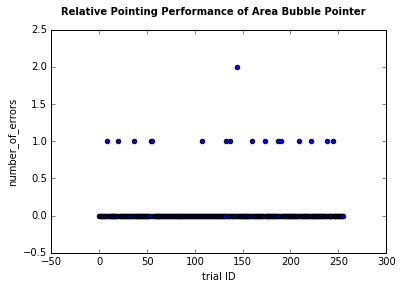

In [236]:
# creates a scatter plot showing relative pointing performance of the new pointing technique
create_scatter_plot(range(len(data_PT[NUMBER_ERRORS])), list(data_PT[NUMBER_ERRORS]),
                   'Relative Pointing Performance of Area Bubble Pointer', TRIAL_ID,
                   NUMBER_ERRORS, marker='o', color='b')


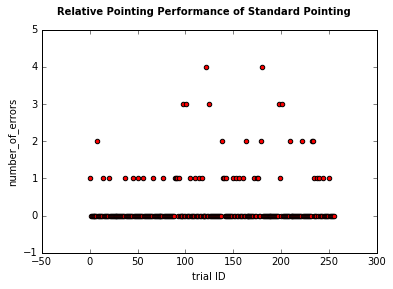

In [237]:
# creates a scatter plot showing relative pointing performance of standard pointing
create_scatter_plot(range(len(data_SP[NUMBER_ERRORS])), list(data_SP[NUMBER_ERRORS]),
                   'Relative Pointing Performance of Standard Pointing', TRIAL_ID,
                    NUMBER_ERRORS, marker=CIRCLE_MARKER, color=RED)


## Boxplots showing absolute and relative pointing performance
The following two boxplots show the absolute and relative pointing performance of both pointing techniques (i.e.
standard pointing and area bubble pointing)

Median SP: 660.0
Median PT: 551.0
Mean SP: 806.90625
Mean PT: 583.71875


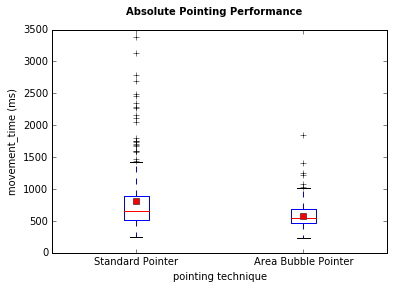

In [238]:
# this method creates a boxplot with its title and x-/y-labels
def create_boxplot(label, data, title, xlabel, ylabel):
    boxplot(data, labels=label, showmeans=True);
    pylab.suptitle(title, fontweight='bold')
    pylab.xlabel(xlabel)
    pylab.ylabel(ylabel)

# this method prints out the median of given data
def print_median(data, label):
    print("Median " + str(label) + ": " + str(median(data)))

# this method prints out the mean of given data
def print_mean(data, label):
    print("Mean " + str(label) + ": " + str(mean(data)))
    
# label the boxplot elements, get data and create a boxplot with the given data
label = [STANDARD_POINTER, AREA_BUBBLE_POINTER]
boxplot_data = [data_SP[MOVEMENT_TIME], data_PT[MOVEMENT_TIME]]
create_boxplot(label, boxplot_data, 'Absolute Pointing Performance', 'pointing technique', MOVEMENT_TIME)

# print out medians and means of absolute pointing performance
print_median(data_SP[MOVEMENT_TIME], "SP")
print_median(data_PT[MOVEMENT_TIME], "PT")
print_mean(data_SP[MOVEMENT_TIME], "SP")
print_mean(data_PT[MOVEMENT_TIME], "PT")


Median SP: 0.0
Median PT: 0.0
Mean SP: 0.28125
Mean PT: 0.0703125


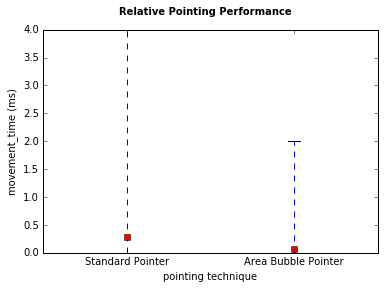

In [239]:
# label the boxplot elements, get data and create a boxplot with the given data
label = ['Standard Pointer', 'Area Bubble Pointer']
boxplot_data = [data_SP[NUMBER_ERRORS], data_PT[NUMBER_ERRORS]]
create_boxplot(label, boxplot_data, 'Relative Pointing Performance', 'pointing technique', MOVEMENT_TIME)

# print out medians and means of relative pointing performance
print_median(data_SP[NUMBER_ERRORS], "SP")
print_median(data_PT[NUMBER_ERRORS], "PT")
print_mean(data_SP[NUMBER_ERRORS], "SP")
print_mean(data_PT[NUMBER_ERRORS], "PT")


## t-Test
The following t-test calculates whether there are significant differences in task performance when using standard pointing and pointing technique (= Area Bubble Pointer)

In [240]:
# calculates the p-value of a t-test given two samples
def calculate_p_value(UV1, UV2):
    _, p_value = ttest_ind(UV1, UV2)
    return p_value

# print out p-values of relative and absolute task performance
print("p-value SP - PT (Relative performance): " + str(calculate_p_value(data_SP[NUMBER_ERRORS],
                                                                         data_PT[NUMBER_ERRORS])))
print("p-value SP - PT (Absolute performance): " + str(calculate_p_value(data_SP[MOVEMENT_TIME],
                                                                         data_PT[MOVEMENT_TIME])))


p-value SP - PT (Relative performance): 6.80326105086e-06
p-value SP - PT (Absolute performance): 6.6213622428e-11


## User performance
The following **scatterpots** and *boxplots* indicate how well the task performance of the single users was.

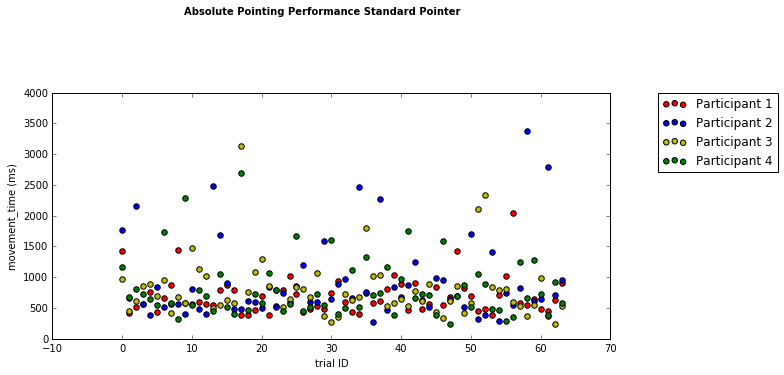

In [241]:
# get scatterplot data of absolute pointing performance of standard pointer from every participant
scatterplots_data = [ScatterPlotData(data_SP_USER1[MOVEMENT_TIME], CIRCLE_MARKER, RED, 'Participant 1'),
                     ScatterPlotData(data_SP_USER2[MOVEMENT_TIME], CIRCLE_MARKER, BLUE, 'Participant 2'),
                     ScatterPlotData(data_SP_USER3[MOVEMENT_TIME], CIRCLE_MARKER, YELLOW, 'Participant 3'), 
                     ScatterPlotData(data_SP_USER4[MOVEMENT_TIME], CIRCLE_MARKER, GREEN, 'Participant 4')]

# create a scatterplot figure showing absolute pointing performance using standard pointer separated by participants
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Absolute Pointing Performance Standard Pointer', 
                                        TRIAL_ID, MOVEMENT_TIME))


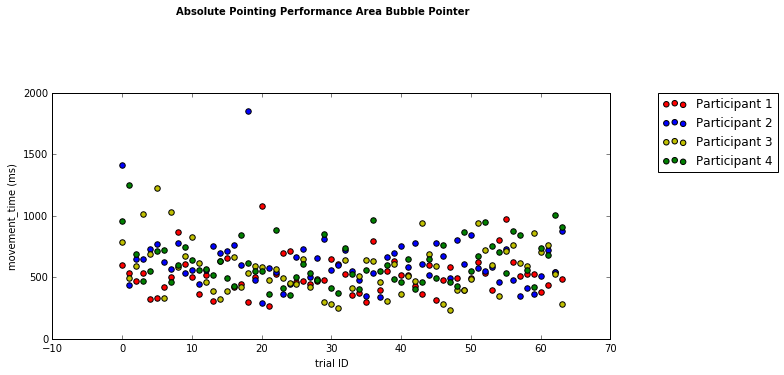

In [242]:
scatterplots_data = [ScatterPlotData(data_PT_USER1[MOVEMENT_TIME], CIRCLE_MARKER, RED, 'Participant 1'),
                     ScatterPlotData(data_PT_USER2[MOVEMENT_TIME], CIRCLE_MARKER, BLUE, 'Participant 2'),
                     ScatterPlotData(data_PT_USER3[MOVEMENT_TIME], CIRCLE_MARKER, YELLOW, 'Participant 3'), 
                     ScatterPlotData(data_PT_USER4[MOVEMENT_TIME], CIRCLE_MARKER, GREEN, 'Participant 4')]

# create a scatterplot figure showing absolute pointing performance using area bubble pointer separated by participants
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Absolute Pointing Performance Area Bubble Pointer', 
                                        TRIAL_ID, MOVEMENT_TIME))


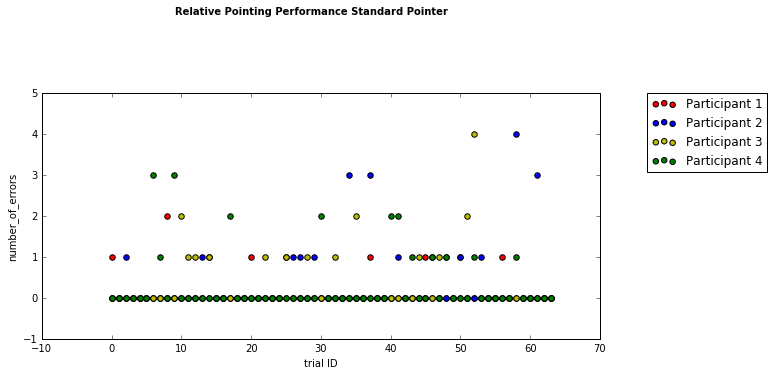

In [243]:
scatterplots_data = [ScatterPlotData(data_SP_USER1[NUMBER_ERRORS], CIRCLE_MARKER, RED, 'Participant 1'),
                     ScatterPlotData(data_SP_USER2[NUMBER_ERRORS], CIRCLE_MARKER, BLUE, 'Participant 2'),
                     ScatterPlotData(data_SP_USER3[NUMBER_ERRORS], CIRCLE_MARKER, YELLOW, 'Participant 3'), 
                     ScatterPlotData(data_SP_USER4[NUMBER_ERRORS], CIRCLE_MARKER, GREEN, 'Participant 4')]

# create a scatterplot figure showing relative pointing performance using standard pointer separated by participants
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Relative Pointing Performance Standard Pointer', 
                                        TRIAL_ID, NUMBER_ERRORS))


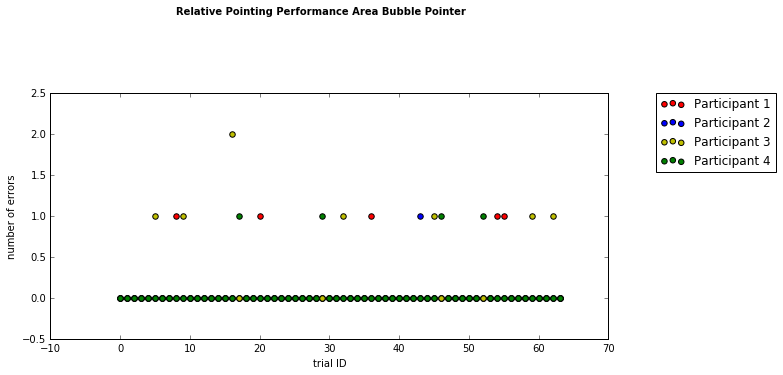

In [244]:
scatterplots_data = [ScatterPlotData(data_PT_USER1[NUMBER_ERRORS], CIRCLE_MARKER, RED, 'Participant 1'),
                     ScatterPlotData(data_PT_USER2[NUMBER_ERRORS], CIRCLE_MARKER, BLUE, 'Participant 2'),
                     ScatterPlotData(data_PT_USER3[NUMBER_ERRORS], CIRCLE_MARKER, YELLOW, 'Participant 3'), 
                     ScatterPlotData(data_PT_USER4[NUMBER_ERRORS], CIRCLE_MARKER, GREEN, 'Participant 4')]

# create a scatterplot figure showing relative pointing performance using area bubble pointer separated by participants
create_new_scatterplot_figure(scatterplots_data, 
                              LabelData('Relative Pointing Performance Area Bubble Pointer', 
                                        'trial ID', 'number of errors'))


Median SP participant 1: 600.0
Median SP participant 2: 678.0
Median SP participant 3: 676.0
Median SP participant 4: 695.0
Mean SP participant 1: 692.828125
Mean SP participant 2: 918.71875
Mean SP participant 3: 801.5
Mean SP participant 4: 814.578125


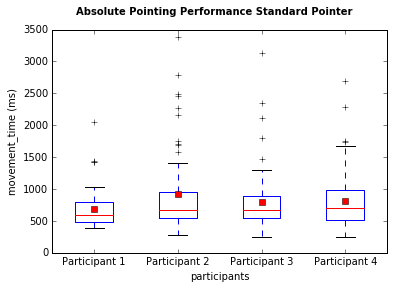

In [245]:
# label the boxplot elements, get data from each user and create a boxplot with the given data
label = ['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4']
boxplot_data = [data_SP_USER1[MOVEMENT_TIME], data_SP_USER2[MOVEMENT_TIME], 
                data_SP_USER3[MOVEMENT_TIME], data_SP_USER4[MOVEMENT_TIME]]
create_boxplot(label, boxplot_data, 'Absolute Pointing Performance Standard Pointer', 
               'participants', MOVEMENT_TIME)

# print medians and means of absolute pointing performance separated by users when using standard pointing
print_median(data_SP_USER1[MOVEMENT_TIME], "SP participant 1")
print_median(data_SP_USER2[MOVEMENT_TIME], "SP participant 2")
print_median(data_SP_USER3[MOVEMENT_TIME], "SP participant 3")
print_median(data_SP_USER4[MOVEMENT_TIME], "SP participant 4")
print_mean(data_SP_USER1[MOVEMENT_TIME], "SP participant 1")
print_mean(data_SP_USER2[MOVEMENT_TIME], "SP participant 2")
print_mean(data_SP_USER3[MOVEMENT_TIME], "SP participant 3")
print_mean(data_SP_USER4[MOVEMENT_TIME], "SP participant 4")


Median PT participant 1: 500.5
Median PT participant 2: 593.0
Median PT participant 3: 550.5
Median PT participant 4: 563.5
Mean PT participant 1: 518.140625
Mean PT participant 2: 628.46875
Mean PT participant 3: 563.34375
Mean PT participant 4: 624.921875


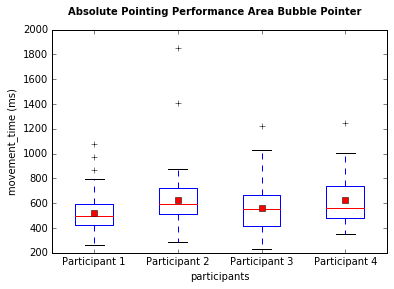

In [246]:
# label the boxplot elements, get data from each user and create a boxplot with the given data
label = ['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4']
boxplot_data = [data_PT_USER1[MOVEMENT_TIME], data_PT_USER2[MOVEMENT_TIME], 
                data_PT_USER3[MOVEMENT_TIME], data_PT_USER4[MOVEMENT_TIME]]
create_boxplot(label, boxplot_data, 'Absolute Pointing Performance Area Bubble Pointer',
              'participants', MOVEMENT_TIME)

# print medians and means of absolute pointing performance separated by users when using area bubble pointer
print_median(data_PT_USER1[MOVEMENT_TIME], "PT participant 1")
print_median(data_PT_USER2[MOVEMENT_TIME], "PT participant 2")
print_median(data_PT_USER3[MOVEMENT_TIME], "PT participant 3")
print_median(data_PT_USER4[MOVEMENT_TIME], "PT participant 4")
print_mean(data_PT_USER1[MOVEMENT_TIME], "PT participant 1")
print_mean(data_PT_USER2[MOVEMENT_TIME], "PT participant 2")
print_mean(data_PT_USER3[MOVEMENT_TIME], "PT participant 3")
print_mean(data_PT_USER4[MOVEMENT_TIME], "PT participant 4")


Median SP participant 1: 0.0
Median SP participant 2: 0.0
Median SP participant 3: 0.0
Median SP participant 4: 0.0
Mean SP participant 1: 0.140625
Mean SP participant 2: 0.359375
Mean SP participant 3: 0.3125
Mean SP participant 4: 0.3125


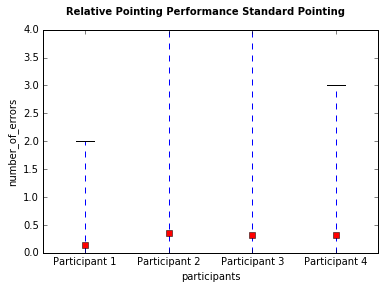

In [247]:
# label the boxplot elements, get data from each user and create a boxplot with the given data
label = ['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4']
boxplot_data = [data_SP_USER1[NUMBER_ERRORS], data_SP_USER2[NUMBER_ERRORS], 
                data_SP_USER3[NUMBER_ERRORS], data_SP_USER4[NUMBER_ERRORS]]
create_boxplot(label, boxplot_data, 'Relative Pointing Performance Standard Pointing',
              'participants', NUMBER_ERRORS)

# print medians and means of relatvie pointing performance separated by users when using standard pointing
print_median(data_SP_USER1[NUMBER_ERRORS], "SP participant 1")
print_median(data_SP_USER2[NUMBER_ERRORS], "SP participant 2")
print_median(data_SP_USER3[NUMBER_ERRORS], "SP participant 3")
print_median(data_SP_USER4[NUMBER_ERRORS], "SP participant 4")
print_mean(data_SP_USER1[NUMBER_ERRORS], "SP participant 1")
print_mean(data_SP_USER2[NUMBER_ERRORS], "SP participant 2")
print_mean(data_SP_USER3[NUMBER_ERRORS], "SP participant 3")
print_mean(data_SP_USER4[NUMBER_ERRORS], "SP participant 4")


Median PT participant 1: 0.0
Median PT participant 2: 0.0
Median PT participant 3: 0.0
Median PT participant 4: 0.0
Mean PT participant 1: 0.078125
Mean PT participant 2: 0.015625
Mean PT participant 3: 0.125
Mean PT participant 4: 0.0625


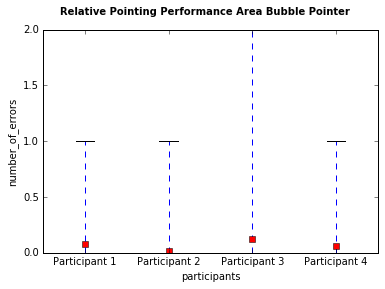

In [248]:
# label the boxplot elements, get data from each user and create a boxplot with the given data
label = ['Participant 1', 'Participant 2', 'Participant 3', 'Participant 4']
boxplot_data = [data_PT_USER1[NUMBER_ERRORS], data_PT_USER2[NUMBER_ERRORS], 
                data_PT_USER3[NUMBER_ERRORS], data_PT_USER4[NUMBER_ERRORS]]
create_boxplot(label, boxplot_data, 'Relative Pointing Performance Area Bubble Pointer',
              'participants', NUMBER_ERRORS)

# print medians and means of relative pointing performance separated by users when using area bubble pointer
print_median(data_PT_USER1[NUMBER_ERRORS], "PT participant 1")
print_median(data_PT_USER2[NUMBER_ERRORS], "PT participant 2")
print_median(data_PT_USER3[NUMBER_ERRORS], "PT participant 3")
print_median(data_PT_USER4[NUMBER_ERRORS], "PT participant 4")
print_mean(data_PT_USER1[NUMBER_ERRORS], "PT participant 1")
print_mean(data_PT_USER2[NUMBER_ERRORS], "PT participant 2")
print_mean(data_PT_USER3[NUMBER_ERRORS], "PT participant 3")
print_mean(data_PT_USER4[NUMBER_ERRORS], "PT participant 4")


## Discussion
The evaluation of the area bubble pointer has shown that there are differences in task performance between this pointing technique and the standard pointer. This assumption can be seen in several visualizations. For instance, the scatterplots of relative and absolute task performance indicate that there is a tendency that using standard pointing technique takes longer to click on targets and has a higher error rate. This assumption is supported by boxplots that show that absolute task performance is higher when using standard pointing technique. Although the medians of standard and new pointing technique are equal at relative task performance, the mean of standard pointing is slightly higher than the mean of the area bubble pointer which means that the error rate is slightly higher there.

Finally, a t-test was conducted that yielded a significant difference between standard pointing technique and area bubble pointing in both absolute and relative task performance. However, this result has to be criticized as no test for 	homogeneity of variance and normal distribution was conducted. Further, the boxplot show that the medians and means are quite close to each other and many values of both distributions are overlapping. This leads to the conclusion that there is no significant difference in using the standard pointing technique and the new pointing technique. Due to this, our hypothesis must be refused.

Howevere, it is important to mention that more participants would be needed to gain valid results and a tendency towards a better task performance when using the area bubble pointing technique can be seen as explained above.
